# <font color=red> Regression -Predicting the future

In [6]:
!pip install xlrd



     ---------------------------------------- 96.5/96.5 kB 1.1 MB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('cars.xls')

In [ ]:
# EDA

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [10]:
df.sample(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
749,15277.067588,16951,Saturn,Ion,Quad Coupe 2D,Coupe,4,2.2,2,0,1,0
557,16283.958991,26511,Pontiac,Grand Prix,GT Sedan 4D,Sedan,6,3.8,4,1,0,1
660,26841.080835,10003,SAAB,9_3 HO,Aero Sedan 4D,Sedan,4,2.0,4,1,1,0
360,21757.049509,1853,Chevrolet,Impala,LS Sedan 4D,Sedan,6,3.8,4,1,0,0
227,11203.146109,27364,Chevrolet,Cavalier,Coupe 2D,Coupe,4,2.2,2,1,1,1


In [13]:
df['Make'].nunique(),df['Model'].nunique(),df['Type'].nunique()

(6, 32, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [16]:
df.shape

(804, 12)

In [17]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [18]:
df.corr()

C:\Users\abdul\AppData\Local\Temp\ipykernel_8516\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [21]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [24]:
df['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [4]:
import seaborn as sns

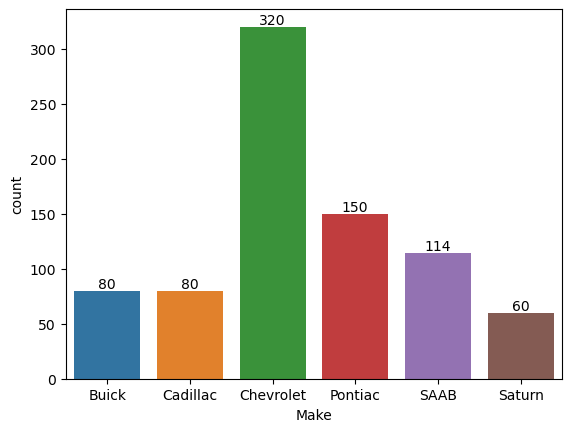

In [33]:
ax=sns.countplot(x=df['Make'])
ax.bar_label(ax.containers[0]);

C:\Users\abdul\AppData\Local\Temp\ipykernel_8516\609742482.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

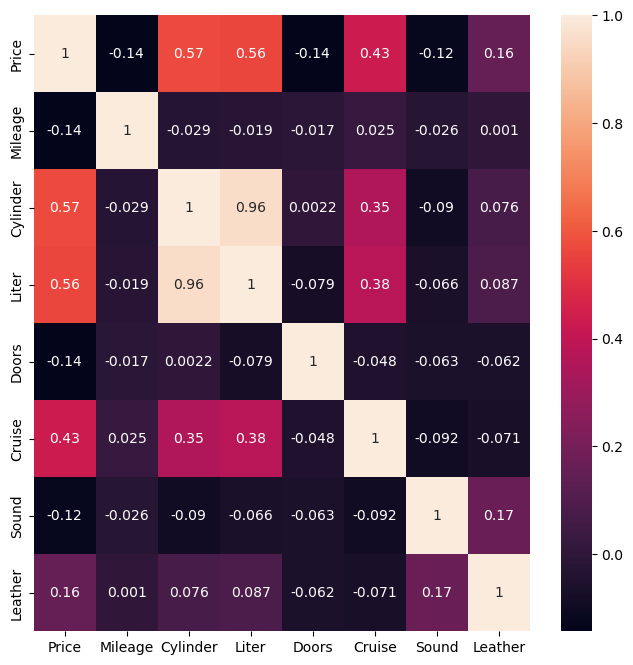

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [38]:
df.shape

(804, 12)

In [40]:
abs(df.corr()['Price']).sort_values(ascending=False)

C:\Users\abdul\AppData\Local\Temp\ipykernel_8516\1245541613.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()['Price']).sort_values(ascending=False)


Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

In [41]:
#Rules of thumb-take the columns correlations above 0.20 and below 0.90.

In [42]:
df['Doors'].value_counts()

4    614
2    190
Name: Doors, dtype: int64

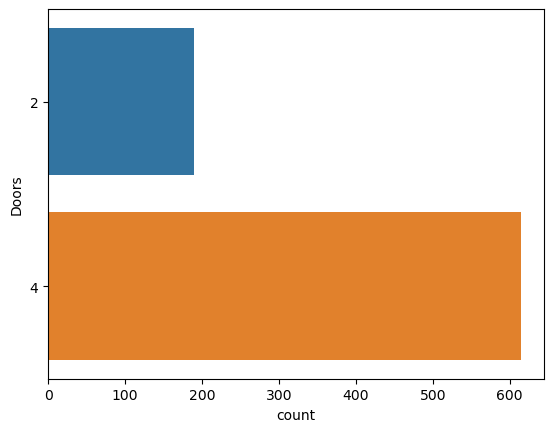

In [44]:
sns.countplot(y=df['Doors']);

In [47]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

# Modelling

In [5]:
x=df[['Mileage','Cylinder','Liter','Cruise']] #attributes,properties,predictors,descriptors,columns
y=df['Price'] #Target variable,predictee

In [54]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [55]:
#rule of thumb never show test data to a model

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#seed
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.20,random_state=42)

In [58]:
x_train.shape

(643, 4)

In [59]:
x_test.shape

(161, 4)

In [60]:
643/804

0.7997512437810945

In [61]:
161/804

0.20024875621890548

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
model=lr.fit(x_train,y_train) #modeling

In [11]:
pred=model.predict(x_test)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [69]:
r2_score(pred,y_test) ##the negative value of r2 is beacaise we didint include the make adn model columns,which was basicallhy in object data type.

-0.3671260571211772

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [13]:
x=df[['Mileage','Cylinder','Liter','Cruise','Make','Trim']] #attributes,properties,predictors,descriptors,columns
y=df['Price'] #Target variable,predictee

In [72]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D


In [73]:
#we need to convert the trim and make datatypes to numerical ones,thus we use dthe followoing codes

In [14]:
x=pd.get_dummies(x,drop_first=True)

In [75]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.20,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()

In [18]:
model=lr.fit(x_train,y_train)

In [19]:
pred=model.predict(x_test)

In [20]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [21]:
r2_score(pred,y_test)

0.9717252793475158

In [22]:
(mean_squared_error(pred,y_test))**0.5

1523.6314728711307

In [85]:
mean_absolute_error(pred,y_test)

1091.6117541195356

In [ ]:
#we will verify if the above is correct enuf by testign with another ml model.

In [23]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [24]:
R=Ridge()
L=Lasso()
EN=ElasticNet()

In [25]:
R.fit(x_train,y_train)
L.fit(x_train,y_train)
EN.fit(x_train,y_train)



ElasticNet()

In [26]:
predr=R.predict(x_test)
predl=L.predict(x_test)
preden=EN.predict(x_test)

In [27]:
r2_score(predr,y_test),r2_score(predl,y_test),r2_score(preden,y_test)

(0.9684687553754917, 0.9712425418609402, -0.21210080624465188)

In [28]:
lr.coef_ #the coefficients are actually the slope of the regression line between price(y) and the predictors(x) variables.

array([-1.98809431e-01, -2.60219053e+03,  7.38331957e+03, -1.05024563e+02,
        1.55364461e+04, -2.81688090e+03, -3.59594608e+03,  6.85100028e+03,
       -2.29878609e+03,  3.90588224e+03, -2.64773527e+03, -1.26995361e+03,
        7.05993990e+03, -2.22310734e+02,  1.38127365e+02, -8.04390904e+03,
       -6.79607391e+03, -6.85437716e+03,  3.54018314e+03, -5.72790226e+03,
       -1.11979437e+04, -8.32030557e+03, -7.59431897e+03, -8.10925499e+03,
       -6.53924263e+03, -3.82628105e+02, -5.76220228e+03, -3.63992297e+03,
        1.67584142e+04, -5.32327214e+03, -7.83067529e+03, -4.64523486e+03,
       -7.53303979e+03, -6.65186020e+03, -7.63546793e+03, -6.87040602e+03,
       -6.33606759e+03, -3.92489639e+03, -7.03882417e+03, -6.17480932e+03,
       -8.14421976e+03,  4.52867027e+03, -2.53728086e+03, -2.10433902e+03,
       -7.88530569e+03, -6.07227049e+03, -6.65263910e+03, -5.53516395e+03,
       -4.78023915e+03, -3.13661125e+03, -6.92039280e+03, -5.51518953e+03,
       -7.77024475e+03, -

In [29]:
R.coef_

array([-1.93823618e-01, -1.88078374e+03,  6.44671917e+03, -9.29949628e+01,
        1.52364487e+04, -2.81771046e+03, -2.70789519e+03,  1.07858527e+04,
       -2.14453884e+03,  3.88741543e+03, -1.88708742e+03, -4.72868196e+02,
        6.66565774e+03,  3.53291023e+02,  7.68801882e+02, -3.24731732e+03,
       -2.06953415e+03, -1.91333229e+03,  8.00487890e+03, -1.21753826e+03,
       -5.89539198e+03, -3.61993822e+03, -2.97992725e+03, -4.16700761e+03,
       -2.71287667e+03,  2.64515638e+03, -1.80355788e+03, -5.11513561e+02,
        1.89124935e+04, -1.35096615e+03, -3.09019730e+03, -5.49229411e+02,
       -2.70619403e+03, -2.16137976e+03, -2.64294459e+03, -2.05976372e+03,
       -1.52484709e+03,  8.25037789e+01, -2.36643209e+03, -1.75002997e+03,
       -3.16654242e+03,  4.48743332e+03, -1.80890391e+03, -1.20788716e+03,
       -3.17475727e+03, -1.53551609e+03, -2.73641113e+03, -1.58418118e+03,
       -1.34189584e+02,  1.30948990e+03, -2.53524777e+03, -1.20769282e+03,
       -3.35794159e+03, -

In [30]:
L.coef_

array([-1.96663588e-01, -2.53283614e+03,  7.17659940e+03, -1.29978468e+02,
        1.59177722e+04, -2.59818809e+03, -2.62423276e+03,  9.78965885e+03,
       -2.13517240e+03,  4.05472579e+03, -2.33706923e+03, -9.02847380e+02,
        7.19650223e+03,  0.00000000e+00,  3.34088814e+02, -4.62213373e+03,
       -3.35156592e+03, -3.35594163e+03,  6.97507516e+03, -2.80839285e+03,
       -7.72432001e+03, -5.19503417e+03, -4.47161877e+03, -5.68796783e+03,
       -4.09220152e+03,  1.67505052e+03, -3.26081184e+03, -1.08542142e+03,
        1.97351341e+04, -2.14155364e+03, -4.74872124e+03, -1.72794258e+03,
       -4.32587237e+03, -3.62667306e+03, -4.55114887e+03, -3.82453130e+03,
       -3.08395313e+03, -1.01771105e+03, -3.84807121e+03, -3.14923666e+03,
       -4.67992177e+03,  4.68209925e+03, -2.21512935e+03, -1.74494437e+03,
       -4.71257237e+03, -2.99627980e+03, -4.27409954e+03, -3.02658011e+03,
       -1.53921278e+03,  0.00000000e+00, -3.96771960e+03, -2.52794398e+03,
       -4.77019905e+03, -

In [31]:
EN.coef_

array([-1.66661168e-01,  2.18671765e+03,  1.59021098e+03,  1.23657723e+03,
        2.01065089e+03, -1.93022709e+03, -1.24529574e+03,  2.46466210e+03,
       -5.21714716e+02,  2.89240640e+02,  2.44441360e+02,  2.04133012e+02,
        3.61351477e+02,  4.55873142e+02,  2.09389687e+02, -1.30700958e+02,
       -8.11058700e+01, -4.46966609e+01,  3.10932650e+02, -1.38507928e+02,
       -1.80753000e+02,  1.14287774e+02,  1.30978880e+02, -1.70650437e+02,
       -2.14017016e+02,  1.85916102e+01, -9.69535915e+01, -1.19130678e+02,
        8.12569787e+02, -1.30740897e+02, -2.55753177e+02, -8.51646515e+01,
       -8.19222171e+01, -3.92715018e+02, -6.68546455e+01, -6.58105390e+01,
       -7.36510297e+01, -8.32585650e+01, -1.07001353e+02, -1.83927935e+02,
       -1.01400394e+02,  3.39719928e+02,  1.16780187e+02,  2.35732666e+02,
       -1.44076459e+02, -1.11844559e+02, -1.90871457e+02, -8.78363205e+01,
       -3.65445589e+01,  7.61971901e+00, -1.38216702e+02, -4.74525542e+01,
       -2.80950642e+02, -